In [4]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [30]:
df_receita = pd.read_csv('dados/processados/SP/2022/DeputadoFederal/receita_candidato.csv', encoding='latin-1', sep=',')
df_receita = df_receita[df_receita['VR_RECEITA']>0]
df_receita_p = df_receita.pivot_table(index='SQ_CANDIDATO', columns='DS_ORIGEM_RECEITA', values='VR_RECEITA', aggfunc='sum', fill_value=0)


In [31]:
df_candidato = pd.read_csv('dados/processados/SP/2022/DeputadoFederal/candidato.csv', encoding='latin-1', sep=',')
df_candidato = df_candidato[['SQ_CANDIDATO', 'SG_PARTIDO', 'SG_FEDERACAO', 'DS_GENERO', 'DS_COR_RACA', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA']]
df_candidato = pd.merge(df_candidato, df_receita_p, on='SQ_CANDIDATO')
df_candidato

,SQ_CANDIDATO,SG_PARTIDO,SG_FEDERACAO,DS_GENERO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,Doações pela Internet,Recursos de Financiamento Coletivo,Recursos de origens não identificadas,Recursos de outros candidatos,Recursos de partido político,Recursos de pessoas físicas,Recursos próprios,Rendimentos de aplicações financeiras
0,250001643887,PSC,#NULO#,MASCULINO,PARDA,ADVOGADO,3176572.53,0,0.00,0.00,0.00,10000.00,3170.00,0.00,0.00
1,250001597671,NOVO,#NULO#,FEMININO,BRANCA,PROFESSOR DE ENSINO SUPERIOR,3176572.53,0,34539.28,0.00,0.00,46841.53,954467.70,0.00,0.00
2,250001611240,MDB,#NULO#,MASCULINO,BRANCA,OUTROS,3176572.53,0,0.00,0.00,0.00,1200000.00,1514945.14,19400.00,0.00
3,250001635955,PMB,#NULO#,MASCULINO,BRANCA,SERVIDOR PÚBLICO MUNICIPAL,3176572.53,0,0.00,0.00,0.00,0.00,0.00,1801.00,0.00
4,250001620711,PATRIOTA,#NULO#,MASCULINO,BRANCA,MILITAR REFORMADO,3176572.53,0,0.00,0.00,1000.00,401118.90,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,250001717128,AGIR,#NULO#,MASCULINO,BRANCA,OUTROS,3176572.53,0,0.00,0.00,5000.00,0.00,0.00,0.00,0.00
1398,250001604937,PSD,#NULO#,MASCULINO,PARDA,SERVIDOR PÚBLICO MUNICIPAL,3176572.53,0,0.00,0.00,0.00,110256.41,0.00,0.00,0.00
1399,250001620762,PATRIOTA,#NULO#,MASCULINO,BRANCA,OUTROS,3176572.53,0,0.00,0.00,11.00,75778.90,0.00,0.00,0.00
1400,250001715883,PRTB,#NULO#,MASCULINO,BRANCA,SERVIDOR PÚBLICO ESTADUAL,3176572.53,0,0.00,0.00,0.00,2822.09,0.00,0.00,0.00


<Axes: xlabel='SG_PARTIDO', ylabel='Recursos de partido político'>

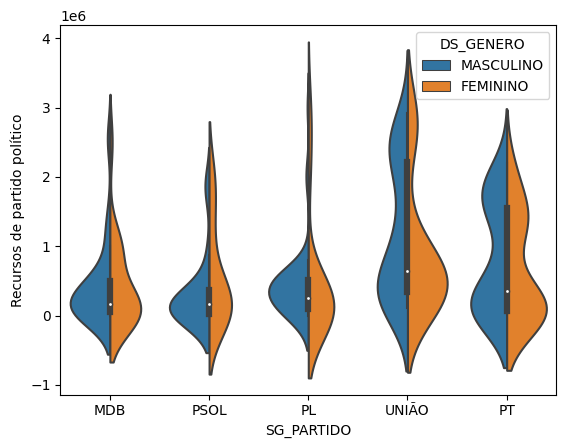

In [32]:
import seaborn as sns

df_filtro = df_candidato[df_candidato['SG_PARTIDO'].isin(['PT', 'PSOL', 'PL', 'MDB', 'UNIÃO'])]
sns.violinplot(data=df_filtro, y='Recursos de partido político', x='SG_PARTIDO', hue='DS_GENERO', split=True)

In [34]:
import seaborn as sns

df_filtro = df_candidato[df_candidato['SG_PARTIDO'].isin(['PT', 'PSOL', 'PL', 'MDB', 'UNIÃO'])]
sns.violinplot(data=df_filtro, y='Recursos de partido político', x='SG_PARTIDO', hue='DS_COR_RACA', split=True)

ValueError: There must be exactly two hue levels to use `split`.'

In [ ]:
df_candidato_receita = df_candidato.groupby(['SQ_CANDIDATO', 'SG_PARTIDO', 'DS_']).agg(
    {'VR_RECEITA': 'sum'}
)

# Ordenar pelo total de receita em ordem decrescente
df_candidato_receita = df_candidato_receita.sort_values(['VR_RECEITA'], ascending=False)

df_candidato_receita